# Adaptation of Univariate Plots

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load dataset
fuel_econ = pd.read_csv('data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Example 1

In [3]:
fuel_econ['VClass'].unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [4]:
# preparing data
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.CategoricalDtype(categories=sedan_classes, ordered=True)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

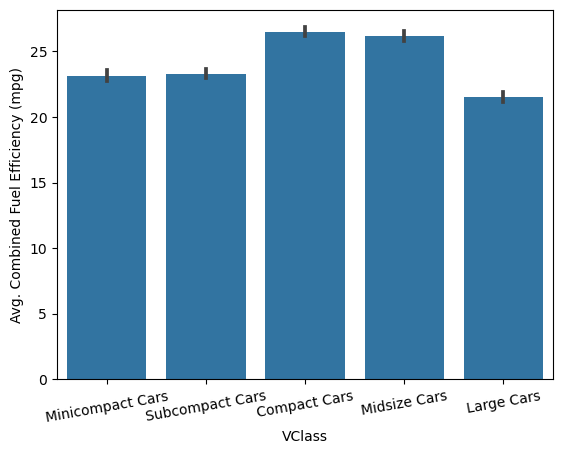

In [5]:
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=10)
plt.ylabel("Avg. Combined Fuel Efficiency (mpg)");

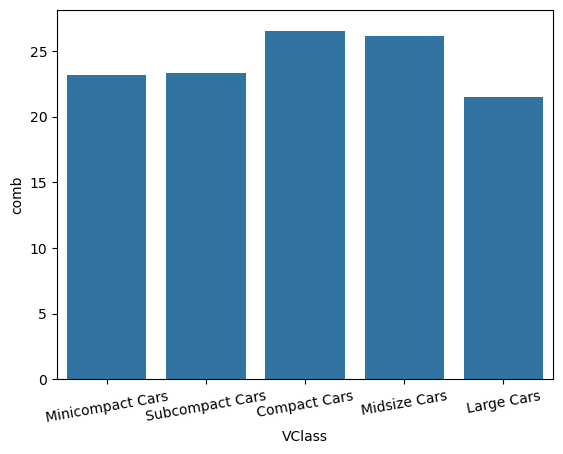

In [6]:
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation=10);

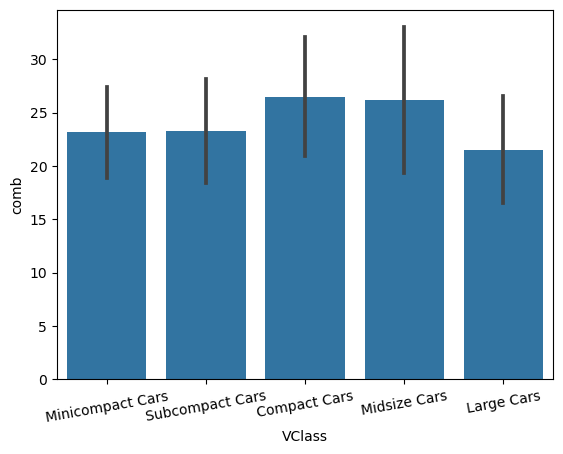

In [7]:
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errorbar='sd')
plt.xticks(rotation=10);

### Example 2

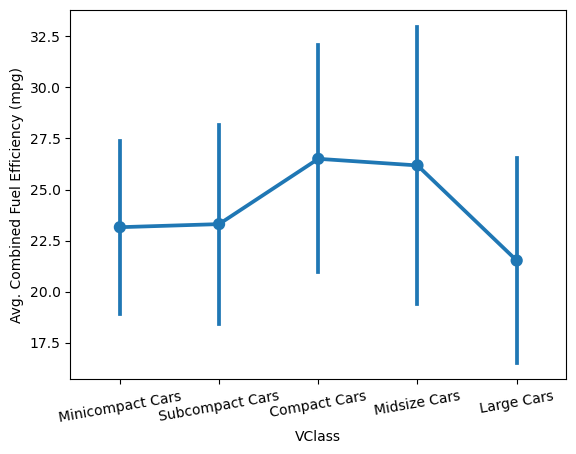

In [8]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', errorbar='sd')
plt.xticks(rotation=10)
plt.ylabel("Avg. Combined Fuel Efficiency (mpg)");

By default, `pointplot` will connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via `linestyles = ""` for nominal data.

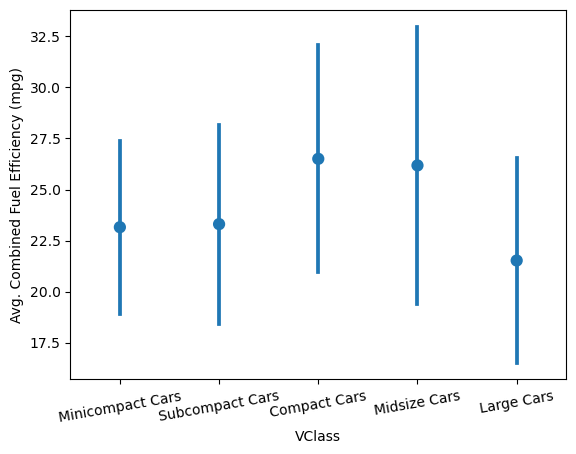

In [9]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', errorbar='sd', linestyles="")
plt.xticks(rotation=10)
plt.ylabel("Avg. Combined Fuel Efficiency (mpg)");

### Example 3. Bringing a few charts together

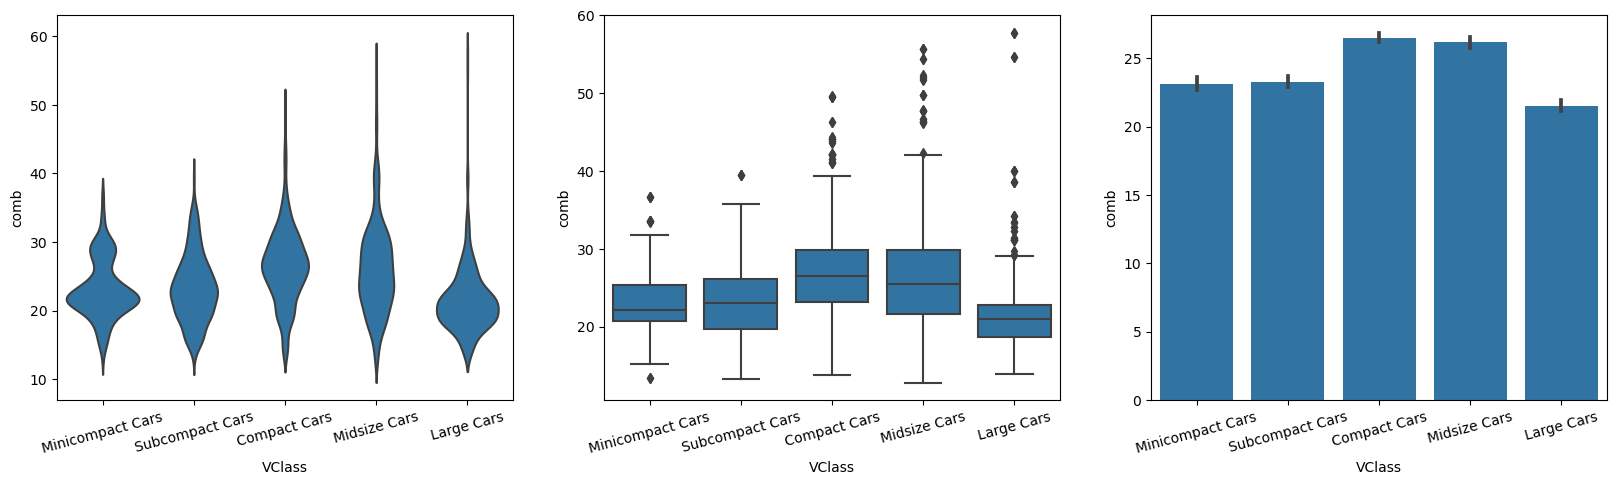

In [25]:
plt.figure(figsize=[20, 5])
base_color = sns.color_palette()[0]

# Left Plot: violin plots
plt.subplot(1, 3, 1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner=None, color=base_color)
plt.xticks(rotation=15)

# Center Plot: box plots
plt.subplot(1, 3, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)

# Right Plot: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)

plt.show()  # display figures